## Introduction to Generating Steric Parameters with DBSTEP
In this Notebook we are going to load a dataset of molecules, complexes of Ni(CO)3 with different N-heterocyclic carbene ligands. We have a pre-computed property, which is the dissociation energy required to remove a molecule of CO.

The steric demand of the ligand is thought to play an important role. We therefore set out to obtain parameters that describe these differential steric effects using DBSTEP (https://github.com/patonlab/DBSTEP)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# read in a CSV
# there are three columns
data = pd.read_csv('carbene_data.csv')
data.head() # shows first 5 lines

,ligand,enthalpy,TEP
0,L1,21.70,2059.99
1,L2,19.12,2063.87
2,L3,20.23,2066.15
3,L4,19.78,2058.72
4,L5,13.90,2082.59


In [20]:
# the structures come from Organometallics 2009, 28, 6458–6461 DOI: 10.1021/om900654g
ligands = data.ligand
xyz_files = ['carbenes/'+ligand+'.xyz' for ligand in ligands]

In [21]:
# import DBSTEP for steric parameters
import dbstep.Dbstep as db  

In [22]:
v_bur = []

for file in xyz_files:
    
    #Create DBSTEP object
    mol = db.dbstep(file, atom1=1, commandline=True, verbose=False, volume=True)  
    
    # append the object property "bur_vol" to the list v_bur
    v_bur.append(mol.bur_vol)

# Add to the dataframe as a new column
data['v_bur'] = v_bur

      R/Å     %V_Bur     %S_Bur
     3.50      56.26       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      57.06       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      56.96       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      57.02       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      61.53       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      56.87       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      56.64       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      56.63       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      61.11       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      56.84       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      65.31       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      51.34       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      56.77       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      58.56       0.00
      R/Å     %V_Bur     %S_Bur
     3.50      61.17       0.00
      R/Å     %V_Bur     %S_Bur
     3.5

In [23]:
# we have added a new descriptor column!
data.head()

,ligand,enthalpy,TEP,v_bur
0,L1,21.70,2059.99,56.261692
1,L2,19.12,2063.87,57.064006
2,L3,20.23,2066.15,56.957379
3,L4,19.78,2058.72,57.016608
4,L5,13.90,2082.59,61.527418


In [24]:
# by default, buried volumes use a sphere of radius 3.5 Angstrom. How about we try some other values?
# lets turn this into a function
def get_buried_volumes(xyz_files, radius=3.5):
    v_bur = []
    
    for file in xyz_files:
        #Create DBSTEP object
        mol = db.dbstep(file, atom1=1, commandline=True, verbose=False, volume=True, r=radius)  
        # append the object property "bur_vol" to the list v_bur
        v_bur.append(mol.bur_vol)

    return v_bur

# Add to the dataframe as a new column
data['v_bur_2.5'] = get_buried_volumes(xyz_files, 2.5)
data['v_bur_3.0'] = get_buried_volumes(xyz_files, 3.0)

      R/Å     %V_Bur     %S_Bur
     2.50      80.89       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.98       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.43       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.89       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      83.99       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.86       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.58       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.31       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      82.89       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.50       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      84.71       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      78.67       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      81.33       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      83.62       0.00
      R/Å     %V_Bur     %S_Bur
     2.50      83.75       0.00
      R/Å     %V_Bur     %S_Bur
     2.5

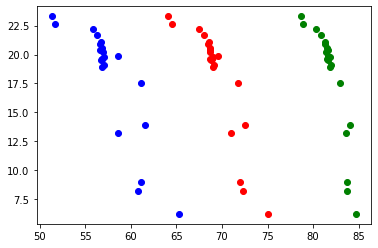

In [25]:
plt.scatter(data['v_bur'], data['enthalpy'], color='b')
plt.scatter(data['v_bur_2.5'], data['enthalpy'], color='g')
plt.scatter(data['v_bur_3.0'], data['enthalpy'], color='r')
plt.show()